## Company Information:
The data set is based upon <a src="https://www.kaggle.com/prateikmahendra/loan-data"> Lending Club Information </a>. 
- TheIrish Dummy Banks  is a  peer to peer lending bank based in the ireland, in which bank provide funds for potential borrowers and bank earn a profit depending on the risk they take (the borrowers credit score). Irish Fake bank provides loan to their loyal customers. The complete data set is borrowed from Lending Club For more basic information about the company please check out the wikipedia article about the company. This dataset is copied and clean from kaggle but it has been changed. The any kind of similarity is just for learning purposes. I dont have any intention for palgrisim I just like to be clear myself. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>


In [1]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df.dtypes

loan_amount                     int64
funded_amount                   int64
investor_funds                float64
term                           object
interest_rate                 float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_income                 float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt 

In [3]:
df.loan_condition.unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

In [4]:
df.loan_condition_cat.unique()

array([0, 1], dtype=int64)

Text(0,0.5,'Loan Amount')

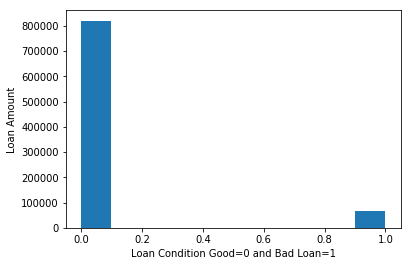

In [5]:
plt.hist(df.loan_condition_cat)
plt.xlabel('Loan Condition Good=0 and Bad Loan=1')
plt.ylabel('Loan Amount')

## Exercise: Decision Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try one more here.

**Use the DecisionTreeRegressor class to fit the housing data**.

You can copy and paste some of the above code, replacing `LinearRegression`
with `DecisionTreeRegressor`.

In [6]:
# before splitting anything, just predict the mean of the entire dataset
df['prediction'] = df.loan_condition_cat.mean()
df

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,home_ownership,annual_income,...,interest_payment_cat,loan_condition_cat,application_type_cat,purpose_cat,loan_status_cat,verification_status_cat,home_ownership_cat,grade_cat,term_cat,prediction
0,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,RENT,24000.00,...,1,0,1,1,1,1,1,2,1,0.075987
1,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,RENT,30000.00,...,2,1,1,2,2,2,1,3,2,0.075987
2,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,RENT,12252.00,...,2,0,1,3,1,3,1,3,1,0.075987
3,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,RENT,49200.00,...,2,0,1,4,1,2,1,3,1,0.075987
4,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,RENT,80000.00,...,1,0,1,4,3,2,1,2,2,0.075987
5,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,RENT,36000.00,...,1,0,1,5,1,2,1,1,1,0.075987
6,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,RENT,47004.00,...,2,0,1,6,3,3,1,3,2,0.075987
7,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,RENT,48000.00,...,2,0,1,2,1,2,1,5,1,0.075987
8,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,OWN,40000.00,...,2,1,1,3,2,2,2,6,2,0.075987
9,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,RENT,15000.00,...,1,1,1,4,2,1,1,2,2,0.075987


In [7]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(df.loan_amount, df.prediction))

16996.247296910202

In [8]:
# define a function that calculates the RMSE for a given split of miles
def loan_amount_split(loan_amount):
    lower_loan_amt = df[df.loan_amount < 1000].loan_condition_cat.mean()
    higher_loan_amt = df[df.loan_amount >= 1000].loan_condition_cat.mean()
    df['prediction'] = np.where(df.loan_amount < 1000, lower_loan_amt, higher_loan_amt)
    return np.sqrt(metrics.mean_squared_error(df.loan_amount, df.prediction))

In [9]:
# calculate RMSE for tree which splits on loan_amount < 5000
print ('RMSE:', loan_amount_split(5000))

RMSE: 16996.247301107338


In [10]:
# calculate RMSE for tree which splits on loan_amount < 100000
print ('RMSE:', loan_amount_split(1000))
df

RMSE: 16996.247301107338


,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,home_ownership,annual_income,...,interest_payment_cat,loan_condition_cat,application_type_cat,purpose_cat,loan_status_cat,verification_status_cat,home_ownership_cat,grade_cat,term_cat,prediction
0,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,RENT,24000.00,...,1,0,1,1,1,1,1,2,1,0.075982
1,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,RENT,30000.00,...,2,1,1,2,2,2,1,3,2,0.075982
2,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,RENT,12252.00,...,2,0,1,3,1,3,1,3,1,0.075982
3,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,RENT,49200.00,...,2,0,1,4,1,2,1,3,1,0.075982
4,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,RENT,80000.00,...,1,0,1,4,3,2,1,2,2,0.075982
5,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,RENT,36000.00,...,1,0,1,5,1,2,1,1,1,0.075982
6,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,RENT,47004.00,...,2,0,1,6,3,3,1,3,2,0.075982
7,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,RENT,48000.00,...,2,0,1,2,1,2,1,5,1,0.075982
8,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,OWN,40000.00,...,2,1,1,3,2,2,2,6,2,0.075982
9,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,RENT,15000.00,...,1,1,1,4,2,1,1,2,2,0.075982


In [11]:
df.loan_amount.min()
df.loan_amount.max()

35000

In [12]:
# check all possible loan_amount splits
loan_amount_range = range(df.loan_amount.min(), df.loan_amount.max(), 1000)
loan_amount_range

range(500, 35000, 1000)

In [13]:
RMSE = [loan_amount_split(loan_amount) for loan_amount in loan_amount_range]

In [14]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0,0.5,'RMSE (lower is better)')

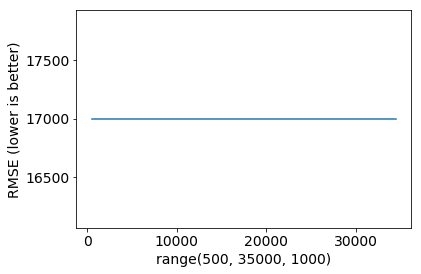

In [15]:
# plot loan amount cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(loan_amount_range, RMSE)
#plt.xlabel('Loan Amount cutpoint')
plt.xlabel(loan_amount_range)
plt.ylabel('RMSE (lower is better)')

In [49]:
#create a new data frame

#new = old[['A', 'C', 'D']].copy()
data = df[['annual_income','loan_amount', 'interest_rate', 'year', 'emp_length_int', 'loan_condition_int', 'home_ownership_cat', 
        'interest_payment_cat', 'loan_condition_cat',  'application_type_cat', 'purpose_cat', 
        'loan_status_cat', 'verification_status_cat', 'grade_cat', 'term_cat', 'prediction']].copy()

In [17]:
data.head(10)

,annual_income,loan_amount,interest_rate,year,emp_length_int,loan_condition_int,home_ownership_cat,interest_payment_cat,loan_condition_cat,application_type_cat,purpose_cat,loan_status_cat,verification_status_cat,grade_cat,term_cat,prediction
0,24000.0,5000,10.65,2011,10.0,0,1,1,0,1,1,1,1,2,1,0.075982
1,30000.0,2500,15.27,2011,0.5,1,1,2,1,1,2,2,2,3,2,0.075982
2,12252.0,2400,15.96,2011,10.0,0,1,2,0,1,3,1,3,3,1,0.075982
3,49200.0,10000,13.49,2011,10.0,0,1,2,0,1,4,1,2,3,1,0.075982
4,80000.0,3000,12.69,2011,1.0,0,1,1,0,1,4,3,2,2,2,0.075982
5,36000.0,5000,7.90,2011,3.0,0,1,1,0,1,5,1,2,1,1,0.075982
6,47004.0,7000,15.96,2011,8.0,0,1,2,0,1,6,3,3,3,2,0.075982
7,48000.0,3000,18.64,2011,9.0,0,1,2,0,1,2,1,2,5,1,0.075982
8,40000.0,5600,21.28,2011,4.0,1,2,2,1,1,3,2,2,6,2,0.075982
9,15000.0,5375,12.69,2011,0.5,1,1,1,1,1,4,2,1,2,2,0.075982


In [18]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(data.annual_income, data.prediction))

99070.55051426591

In [19]:
# define a function that calculates the RMSE for a given split of miles
def annual_income_split(annual_income):
    lower_annual_income = data[data.annual_income < 25000].loan_condition_cat.mean()
    higher_annual_income = data[data.annual_income >= 25000].loan_condition_cat.mean()
    df['prediction'] = np.where(data.annual_income < 25000, lower_annual_income, higher_annual_income)
    return np.sqrt(metrics.mean_squared_error(data.annual_income, data.prediction))

In [20]:
# calculate RMSE for tree which splits on  annual_income< 50000
print ('RMSE:', annual_income_split(50000))

RMSE: 99070.55051426591


In [21]:
# calculate RMSE for tree which splits on loan_amount < 100000
print ('RMSE:', annual_income_split(100000))
df.head(10)

RMSE: 99070.55051426591


,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,home_ownership,annual_income,...,interest_payment_cat,loan_condition_cat,application_type_cat,purpose_cat,loan_status_cat,verification_status_cat,home_ownership_cat,grade_cat,term_cat,prediction
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,1,0,1,1,1,1,1,2,1,0.105056
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,2,1,1,2,2,2,1,3,2,0.075114
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,2,0,1,3,1,3,1,3,1,0.105056
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,2,0,1,4,1,2,1,3,1,0.075114
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,1,0,1,4,3,2,1,2,2,0.075114
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,...,1,0,1,5,1,2,1,1,1,0.075114
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,RENT,47004.0,...,2,0,1,6,3,3,1,3,2,0.075114
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,RENT,48000.0,...,2,0,1,2,1,2,1,5,1,0.075114
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,OWN,40000.0,...,2,1,1,3,2,2,2,6,2,0.075114
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,RENT,15000.0,...,1,1,1,4,2,1,1,2,2,0.105056


In [22]:
data.dtypes

annual_income              float64
loan_amount                  int64
interest_rate              float64
year                         int64
emp_length_int             float64
loan_condition_int           int64
home_ownership_cat           int64
interest_payment_cat         int64
loan_condition_cat           int64
application_type_cat         int64
purpose_cat                  int64
loan_status_cat              int64
verification_status_cat      int64
grade_cat                    int64
term_cat                     int64
prediction                 float64
dtype: object

In [23]:
data['annual_income']=data.annual_income.astype(int)
data['emp_length_int']=data.emp_length_int.astype(int)

In [24]:
# check all possible loan_amount splits
annual_income_range = range(data.annual_income.min(), data.annual_income.max(), 25000)
annual_income_range

range(0, 9500000, 25000)

In [25]:
RMSE = [annual_income_split(data.annual_income) for df.annual_income in annual_income_range]

In [26]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0,0.5,'RMSE (lower is better)')

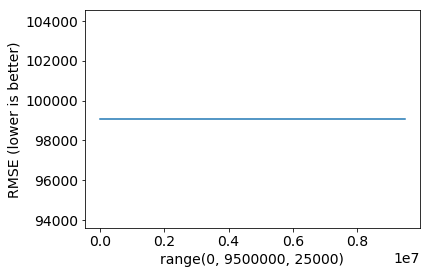

In [27]:
# plot loan amount cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(annual_income_range, RMSE)
#plt.xlabel('Loan Amount cutpoint')
plt.xlabel(annual_income_range)
plt.ylabel('RMSE (lower is better)')

In [28]:
# define X and y
feature_cols = ['annual_income','year','loan_amount','interest_payment_cat', 'loan_condition_cat',
                'application_type_cat','purpose_cat','loan_status_cat','verification_status_cat',
                'home_ownership_cat','grade_cat','term_cat']
X = data[feature_cols]
y = data.loan_condition_cat

In [29]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [30]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.0

## Tuning a regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [31]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.0

In [32]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

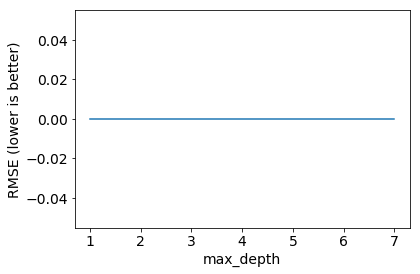

In [33]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [34]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [35]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,annual_income,0.0
1,year,0.0
2,loan_amount,0.0
3,interest_payment_cat,0.0
4,loan_condition_cat,1.0
5,application_type_cat,0.0
6,purpose_cat,0.0
7,loan_status_cat,0.0
8,verification_status_cat,0.0
9,home_ownership_cat,0.0


# Classification Accuracy (Logistic Regression)

Question: Can we predict the Loan condition catagory of a investment given their Loan measurements?

In [36]:
# define X and y
feature_cols = ['annual_income','year','loan_amount','interest_payment_cat', 'loan_condition_cat',
                'application_type_cat','purpose_cat','loan_status_cat','verification_status_cat',
                'home_ownership_cat','grade_cat','term_cat']
X = data[feature_cols]
y = data.loan_condition_cat

In [37]:
## Modeling process
# spilt X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# make class prediction for the testing set
y_pred_class = Logreg.predict(X_test)

- Classification Accuracy : percentage of correct prediction

In [40]:
# calculate Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9233518898329915


- Null accuracy : accuracy that could be achieved by always predicting the most frequent class

In [41]:
# examine the class distribution of the testing set (using panda series method)
y_test.value_counts()

0    204841
1     17004
Name: loan_condition_cat, dtype: int64

In [42]:
y_test.mean()

0.0766481101670085

In [43]:
# calculate the percentage of zeros
1- y_test.mean()

0.9233518898329915

In [44]:
# claculate null accuracy ( for binary classification problem coded as 0/1)
max(y_test.mean(), 1- y_test.mean())

0.9233518898329915

In [45]:
# claculate the null accuracy (for multi-class [for three or more classes] classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.923352
Name: loan_condition_cat, dtype: float64

### Comparing the true and predicted response values

In [46]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making